In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import xarray as xr
from matplotlib import colors
import scipy
from math import sin, cos, sqrt, atan2, radians
from scipy import interpolate
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from matplotlib.patches import Path, PathPatch
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
#importing narr and nmme ensemble file to get lat and lon arrays
narr = xr.open_dataset("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/NARR.nc")
E1 = xr.open_dataset("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/cropped_E1.nc4")

In [3]:
n_data = xr.open_mfdataset("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/acpcp_data/daily/acpcp.*.nc")

/opt/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'acpcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'acpcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'acpcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'acpcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/miniconda3/envs/MPO624/lib/python3.

In [4]:
E1_lat = E1.lat

E1_lon = E1.lon

narr_lat = narr.lat

narr_lon = narr.lon

In [10]:
elon, elat = np.meshgrid(E1_lon, E1_lat)

In [17]:
E1_points = np.ones(elon.shape,dtype=int)
narr_points = np.ones(narr_lat.shape,dtype = int)

In [42]:
E1_points.shape

(96, 288)

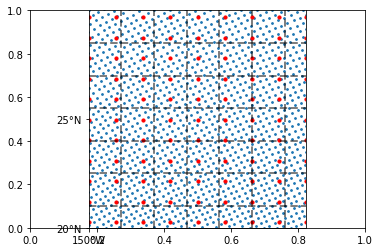

In [50]:
plt.close()
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -140, 20, 30])

# Make a filled contour plot
cs = ax.scatter(narr_lon, narr_lat, s=3,
            transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

cs1 = ax.scatter(elon, elat, s=10,color = "red",
            transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,-140,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,30,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

#cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

#cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])


#Assign colorbar tick labels

#tick_texts = cbar.ax.set_yticklabels(tick_labels)

#plt.title(risk_factors[i])

#outfile = location + risk_factors[i] + ".png"

#plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.savefig("both_points2.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.close()

In [ ]:
flattened_data = n_data.to_dataframe()

In [ ]:
flattened_data

In [ ]:
def point_distance(lat1,lon1,lat2,lon2):
    
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = 1000*R * c
    
    return distance

In [5]:
#setting lat and lon arrays

nlat = narr.lat.values
nlon = narr.lon.values
elat = E1.lat.values
elon = E1.lon.values - 180
etime = E1.time.values

In [11]:
#Plotting NARR ENSO, NAO and PDO risk factors

location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"
risk_factors = ["n_enso_risk_factor","n_nao_risk_factor","n_pdo_risk_factor"]

X = np.array(nlon.flatten())
Y = np.array(nlat.flatten())

for i in range(len(risk_factors)):
    
    input_file = location + risk_factors[i] +'.csv'

    df = pd.read_csv(input_file)

    for j in range(df.shape[1]):

        column_name = 'X'+str(int(j+1))

        df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
        df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
        df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
        df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
        df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
        df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
        df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])

    df2 = df.transpose()
    
    plot_data = df2.to_numpy().flatten()
    
    df_del = pd.DataFrame({"lon":X,"lat":Y,"data":plot_data})
    
    df_filter = df_del.isin([np.nan, np.inf, -np.inf])
    
    df_del = df_del[~df_filter]

    df_del.dropna(inplace=True)

    lon = df_del["lon"]
    lat = df_del["lat"]
    Z = df_del["data"]

    # Set the axes using the specified map projection
    fig, ax = plt.subplots()
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent([-150, -60, 20, 75])

    # Make a filled contour plot
    cs = ax.tricontourf(lon, lat, Z,
                transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

    # Mask ocean data by changing adding ocean feature and changing its zorder
    ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
    # Add coastlines
    ax.coastlines()

    # Define the xticks for longitude
    ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_extent([-150, -60, 20, 75])

    # Define the yticks for latitude
    ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=ccrs.PlateCarree(),
                      linewidth=2, color='black', alpha=0.5, linestyle='--')

    cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

    cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])
    tick_labels = ['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4']

    # Add coastlines
    ax.coastlines()
    
    #Assign colorbar tick labels
    
    tick_texts = cbar.ax.set_yticklabels(tick_labels)
    
    plt.title(risk_factors[i])
    
    outfile = location + risk_factors[i] + ".png"
    
    plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
    plt.close()

In [12]:
#Plotting NMME ENSO, NAO and PDO risk factors

location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"
risk_factors = ["e1_enso_risk_factor","e1_nao_risk_factor","e1_pdo_risk_factor",
               "e2_enso_risk_factor","e2_nao_risk_factor","e2_pdo_risk_factor",
               "e3_enso_risk_factor","e3_nao_risk_factor","e3_pdo_risk_factor",
               "e4_enso_risk_factor","e4_nao_risk_factor","e4_pdo_risk_factor",
               "e5_enso_risk_factor","e5_nao_risk_factor","e5_pdo_risk_factor",
               "e6_enso_risk_factor","e6_nao_risk_factor","e6_pdo_risk_factor",
               "e7_enso_risk_factor","e7_nao_risk_factor","e7_pdo_risk_factor",
               "e8_enso_risk_factor","e8_nao_risk_factor","e8_pdo_risk_factor",
               "e9_enso_risk_factor","e9_nao_risk_factor","e9_pdo_risk_factor"]


for i in range(len(risk_factors)):
    
    input_file = location + risk_factors[i] +'.csv'

    df = pd.read_csv(input_file)

    for j in range(df.shape[1]):

        column_name = 'X'+str(int(j+1))

        df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
        df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
        df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
        df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
        df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
        df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
        df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])
        
    lon_grid, lat_grid = np.meshgrid(elon, elat)

    data = df.transpose()

    # Set the axes using the specified map projection
    fig, ax = plt.subplots()
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent([-150, -60, 20, 75])

    # Make a filled contour plot
    cs = ax.contourf(lon_grid, lat_grid, data,
                transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

    # Mask ocean data by changing adding ocean feature and changing its zorder
    ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
    # Add coastlines
    ax.coastlines()

    # Define the xticks for longitude
    ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_extent([-150, -60, 20, 75])

    # Define the yticks for latitude
    ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=ccrs.PlateCarree(),
                      linewidth=2, color='black', alpha=0.5, linestyle='--')

    cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

    cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])


    # Add coastlines
    ax.coastlines()
    
    #Assign colorbar tick labels
    
    tick_texts = cbar.ax.set_yticklabels(tick_labels)
    
    plt.title(risk_factors[i])
    
    outfile = location + risk_factors[i] + ".png"
    
    plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
# for i in range(len(risk_factors)):
    
#     input_file = location + risk_factors[i] +'.csv'

#     df = pd.read_csv(input_file)

#     df

#     for j in range(df.shape[1]):

#         column_name = 'X'+str(int(j+1))

#         df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
#         df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
#         df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
#         df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
#         df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
#         df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
#         df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
#         df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
#         df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
#         df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
#         df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])
    
#     #risk factor plot

#     fig = plt.figure(figsize=(11,8.5))

#     # Set the axes using the specified map projection
#     ax=plt.axes(projection=ccrs.PlateCarree())

#     lats = elat
#     lons = elon
#     lon_grid, lat_grid = np.meshgrid(lons, lats)
#     X = lon_grid.flatten()
#     Y = lat_grid.flatten()

#     data = df.to_numpy().flatten()

#     cmap = plt.cm.PRGn

#     norm = colors.BoundaryNorm(np.arange(-0.5,11,1), cmap.N)

#     cs = ax.scatter(x=X,y=Y,c=data, cmap=cmap,marker = "s",norm = norm, s=35,alpha=1,transform=ccrs.PlateCarree())

#     # Mask ocean data by changing adding ocean feature and changing its zorder
#     ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')


#     # Add coastlines
#     ax.coastlines()

#     # Define the xticks for longitude
#     ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
#     lon_formatter = cticker.LongitudeFormatter()
#     ax.xaxis.set_major_formatter(lon_formatter)

#     ax.set_extent([-150, -60, 20, 75])

#     # Define the yticks for latitude
#     ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
#     lat_formatter = cticker.LatitudeFormatter()
#     ax.yaxis.set_major_formatter(lat_formatter)
#     ax.gridlines(crs=ccrs.PlateCarree(),
#                   linewidth=2, color='black', alpha=0.5, linestyle='--')

#     #Creat colorbar & center ticks
#     cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)
#     #plt.clim(-0.5, 9.5)

#     tick_labels = ['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4']

#     #Assign colorbar tick labels
#     tick_texts = cbar.ax.set_yticklabels(tick_labels)
#     plt.title(risk_factors[i])
    
#     outfile = location + risk_factors[i] + ".png"
    
#     plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
    plt.close()


In [13]:
#Plotting risk factors for interactions of NARR ENSO+NAO and ENSO+PDO

location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"

double_risk_factors = ["n_enso_pos_nao_neg_risk_factor","n_enso_neg_nao_pos_risk_factor","n_enso_neg_nao_neg_risk_factor",
                      "n_enso_pos_pdo_neg_risk_factor","n_enso_neg_pdo_pos_risk_factor","n_enso_neg_pdo_neg_risk_factor"]

X = np.array(nlon.flatten())
Y = np.array(nlat.flatten())

for i in range(len(double_risk_factors)):
    
    input_file = location + double_risk_factors[i] +'.csv'

    df = pd.read_csv(input_file)

    for j in range(df.shape[1]):

        column_name = 'X'+str(int(j+1))

        df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
        df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
        df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
        df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
        df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
        df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
        df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])

    df2 = df.transpose()
    
    plot_data = df2.to_numpy().flatten()
    
    df_del = pd.DataFrame({"lon":X,"lat":Y,"data":plot_data})
    
    df_filter = df_del.isin([np.nan, np.inf, -np.inf])
    
    df_del = df_del[~df_filter]

    df_del.dropna(inplace=True)

    lon = df_del["lon"]
    lat = df_del["lat"]
    Z = df_del["data"]

    # Set the axes using the specified map projection
    fig, ax = plt.subplots()
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent([-150, -60, 20, 75])

    # Make a filled contour plot
    cs = ax.tricontourf(lon, lat, Z,
                transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

    # Mask ocean data by changing adding ocean feature and changing its zorder
    ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
    # Add coastlines
    ax.coastlines()

    # Define the xticks for longitude
    ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_extent([-150, -60, 20, 75])

    # Define the yticks for latitude
    ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=ccrs.PlateCarree(),
                      linewidth=2, color='black', alpha=0.5, linestyle='--')

    cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

    cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])


    # Add coastlines
    ax.coastlines()
    
    #Assign colorbar tick labels
    
    tick_texts = cbar.ax.set_yticklabels(tick_labels)
    
    plt.title(double_risk_factors[i])
    
    outfile = location + double_risk_factors[i] + ".png"
    
    plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
    plt.close()


In [380]:
#Plotting risk factors for interactions of NMMME ENSO+NAO and ENSO+PDO

location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"
double_risk_factors = ["e1_enso_pos_nao_neg_risk_factor","e1_enso_neg_nao_pos_risk_factor","e1_enso_neg_nao_neg_risk_factor",
                      "e1_enso_pos_pdo_neg_risk_factor","e1_enso_neg_pdo_pos_risk_factor","e1_enso_neg_pdo_neg_risk_factor",
                       "e2_enso_pos_nao_neg_risk_factor","e2_enso_neg_nao_pos_risk_factor","e2_enso_neg_nao_neg_risk_factor",
                      "e2_enso_pos_pdo_neg_risk_factor","e2_enso_neg_pdo_pos_risk_factor","e2_enso_neg_pdo_neg_risk_factor",
                       "e3_enso_pos_nao_neg_risk_factor","e3_enso_neg_nao_pos_risk_factor","e3_enso_neg_nao_neg_risk_factor",
                      "e3_enso_pos_pdo_neg_risk_factor","e3_enso_neg_pdo_pos_risk_factor","e3_enso_neg_pdo_neg_risk_factor",
                       "e4_enso_pos_nao_neg_risk_factor","e4_enso_neg_nao_pos_risk_factor","e4_enso_neg_nao_neg_risk_factor",
                      "e4_enso_pos_pdo_neg_risk_factor","e4_enso_neg_pdo_pos_risk_factor","e4_enso_neg_pdo_neg_risk_factor",
                       "e5_enso_pos_nao_neg_risk_factor","e5_enso_neg_nao_pos_risk_factor","e5_enso_neg_nao_neg_risk_factor",
                      "e5_enso_pos_pdo_neg_risk_factor","e5_enso_neg_pdo_pos_risk_factor","e5_enso_neg_pdo_neg_risk_factor",
                       "e6_enso_pos_nao_neg_risk_factor","e6_enso_neg_nao_pos_risk_factor","e6_enso_neg_nao_neg_risk_factor",
                      "e6_enso_pos_pdo_neg_risk_factor","e6_enso_neg_pdo_pos_risk_factor","e6_enso_neg_pdo_neg_risk_factor",
                       "e7_enso_pos_nao_neg_risk_factor","e7_enso_neg_nao_pos_risk_factor","e7_enso_neg_nao_neg_risk_factor",
                      "e7_enso_pos_pdo_neg_risk_factor","e7_enso_neg_pdo_pos_risk_factor","e7_enso_neg_pdo_neg_risk_factor",
                       "e8_enso_pos_nao_neg_risk_factor","e8_enso_neg_nao_pos_risk_factor","e8_enso_neg_nao_neg_risk_factor",
                      "e8_enso_pos_pdo_neg_risk_factor","e8_enso_neg_pdo_pos_risk_factor","e8_enso_neg_pdo_neg_risk_factor",
                       "e9_enso_pos_nao_neg_risk_factor","e9_enso_neg_nao_pos_risk_factor","e9_enso_neg_nao_neg_risk_factor",
                      "e9_enso_pos_pdo_neg_risk_factor","e9_enso_neg_pdo_pos_risk_factor","e9_enso_neg_pdo_neg_risk_factor"]

for i in range(len(double_risk_factors)):
    
    input_file = location + double_risk_factors[i] +'.csv'

    df = pd.read_csv(input_file)

    for j in range(df.shape[1]):

        column_name = 'X'+str(int(j+1))

        df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
        df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
        df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
        df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
        df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
        df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
        df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])
        
    lon_grid, lat_grid = np.meshgrid(elon, elat)

    data = df.transpose()

    # Set the axes using the specified map projection
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent([-150, -60, 20, 75])

    # Make a filled contour plot
    cs = ax.contourf(lon_grid, lat_grid, data,
                transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

    # Mask ocean data by changing adding ocean feature and changing its zorder
    ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
    # Add coastlines
    ax.coastlines()

    # Define the xticks for longitude
    ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_extent([-150, -60, 20, 75])

    # Define the yticks for latitude
    ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=ccrs.PlateCarree(),
                      linewidth=2, color='black', alpha=0.5, linestyle='--')

    cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

    cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])


    # Add coastlines
    ax.coastlines()
    
    #Assign colorbar tick labels
    
    tick_texts = cbar.ax.set_yticklabels(tick_labels)
    
    plt.title(double_risk_factors[i])
    
    outfile = location + double_risk_factors[i] + ".png"
    
    plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
# for i in range(len(double_risk_factors)):
    
#     input_file = location + double_risk_factors[i] +'.csv'

#     df = pd.read_csv(input_file)

#     df

#     for j in range(df.shape[1]):

#         column_name = 'X'+str(int(j+1))

#         df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
#         df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
#         df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
#         df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
#         df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
#         df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
#         df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
#         df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
#         df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
#         df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
#         df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])
    
#     #risk factor plot

#     fig = plt.figure(figsize=(11,8.5))

#     # Set the axes using the specified map projection
#     ax=plt.axes(projection=ccrs.PlateCarree())

#     lats = elat
#     lons = elon
#     lon_grid, lat_grid = np.meshgrid(lons, lats)
#     X = lon_grid.flatten()
#     Y = lat_grid.flatten()

#     data = df.to_numpy().flatten()

#     cmap = plt.cm.PRGn

#     norm = colors.BoundaryNorm(np.arange(-0.5,11,1), cmap.N)

#     cs = ax.scatter(x=X,y=Y,c=data, cmap=cmap,marker = "s",norm = norm, s=35,alpha=1,transform=ccrs.PlateCarree())

#     # Mask ocean data by changing adding ocean feature and changing its zorder
#     ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')


#     # Add coastlines
#     ax.coastlines()

#     # Define the xticks for longitude
#     ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
#     lon_formatter = cticker.LongitudeFormatter()
#     ax.xaxis.set_major_formatter(lon_formatter)

#     ax.set_extent([-150, -60, 20, 75])

#     # Define the yticks for latitude
#     ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
#     lat_formatter = cticker.LatitudeFormatter()
#     ax.yaxis.set_major_formatter(lat_formatter)
#     ax.gridlines(crs=ccrs.PlateCarree(),
#                   linewidth=2, color='black', alpha=0.5, linestyle='--')

#     #Creat colorbar & center ticks
#     cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)
#     #plt.clim(-0.5, 9.5)

#     tick_labels = ['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4']

#     #Assign colorbar tick labels
#     tick_texts = cbar.ax.set_yticklabels(tick_labels)
#     plt.title(double_risk_factors[i])
    
#     outfile = location + double_risk_factors[i] + ".png"
    
#     plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
    plt.close()



In [293]:
#Plotting risk factors for interactions of all three oscillations together for 

location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"
triple_risk_factors = ["n_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "n_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "n_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "n_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "n_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "n_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "n_enso_neg_nao_neg_pdo_neg_risk_factor"]

X = np.array(nlon.flatten())
Y = np.array(nlat.flatten())

for i in range(len(triple_risk_factors)):
    
    input_file = location + triple_risk_factors[i] +'.csv'

    df = pd.read_csv(input_file)

    for j in range(df.shape[1]):

        column_name = 'X'+str(int(j+1))

        df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
        df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
        df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
        df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
        df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
        df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
        df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])

    df2 = df.transpose()
    
    plot_data = df2.to_numpy().flatten()
    
    df_del = pd.DataFrame({"lon":X,"lat":Y,"data":plot_data})
    
    df_filter = df_del.isin([np.nan, np.inf, -np.inf])
    
    df_del = df_del[~df_filter]

    df_del.dropna(inplace=True)

    lon = df_del["lon"]
    lat = df_del["lat"]
    Z = df_del["data"]

    # Set the axes using the specified map projection
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent([-150, -60, 20, 75])

    # Make a filled contour plot
    cs = ax.tricontourf(lon, lat, Z,
                transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

    # Mask ocean data by changing adding ocean feature and changing its zorder
    ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
    # Add coastlines
    ax.coastlines()

    # Define the xticks for longitude
    ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_extent([-150, -60, 20, 75])

    # Define the yticks for latitude
    ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=ccrs.PlateCarree(),
                      linewidth=2, color='black', alpha=0.5, linestyle='--')

    cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

    cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])


    # Add coastlines
    ax.coastlines()
    
    #Assign colorbar tick labels
    
    tick_texts = cbar.ax.set_yticklabels(tick_labels)
    
    plt.title(triple_risk_factors[i])
    
    outfile = location + triple_risk_factors[i] + ".png"
    
    plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
    plt.close()

In [382]:
#Plotting risk factors for interactions of all three oscillations together

location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"
triple_risk_factors = ["e1_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e1_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e1_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e1_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e1_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e1_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e1_enso_neg_nao_neg_pdo_neg_risk_factor",
                      "e2_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e2_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e2_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e2_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e2_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e2_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e2_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e3_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e3_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e3_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e3_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e3_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e3_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e3_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e4_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e4_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e4_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e4_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e4_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e4_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e4_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e5_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e5_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e5_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e5_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e5_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e5_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e5_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e6_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e6_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e6_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e6_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e6_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e6_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e6_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e7_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e7_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e7_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e7_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e7_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e7_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e7_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e8_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e8_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e8_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e8_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e8_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e8_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e8_enso_neg_nao_neg_pdo_neg_risk_factor",
                       "e9_enso_pos_nao_pos_pdo_neg_risk_factor",
                      "e9_enso_pos_nao_neg_pdo_pos_risk_factor",
                      "e9_enso_pos_nao_neg_pdo_neg_risk_factor",
                      "e9_enso_neg_nao_pos_pdo_pos_risk_factor",
                      "e9_enso_neg_nao_pos_pdo_neg_risk_factor",
                      "e9_enso_neg_nao_neg_pdo_pos_risk_factor",
                      "e9_enso_neg_nao_neg_pdo_neg_risk_factor"]

for i in range(len(triple_risk_factors)):
    
    input_file = location + triple_risk_factors[i] +'.csv'

    df = pd.read_csv(input_file)

    for j in range(df.shape[1]):

        column_name = 'X'+str(int(j+1))

        df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
        df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
        df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
        df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
        df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
        df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
        df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
        df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
        df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])
        
    lon_grid, lat_grid = np.meshgrid(elon, elat)

    data = df.transpose()

    # Set the axes using the specified map projection
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent([-150, -60, 20, 75])

    # Make a filled contour plot
    cs = ax.contourf(lon_grid, lat_grid, data,
                transform = ccrs.PlateCarree(),cmap = plt.cm.PRGn)

    # Mask ocean data by changing adding ocean feature and changing its zorder
    ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
    # Add coastlines
    ax.coastlines()

    # Define the xticks for longitude
    ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)


    # Define the yticks for latitude
    ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.gridlines(crs=ccrs.PlateCarree(),
                      linewidth=2, color='black', alpha=0.5, linestyle='--')

    cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)

    cbar.ax.set_yticklabels(['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4'])


    # Add coastlines
    ax.coastlines()
    
    #Assign colorbar tick labels
    
    tick_texts = cbar.ax.set_yticklabels(tick_labels)
    
    plt.title(triple_risk_factors[i])
    
    outfile = location + triple_risk_factors[i] + ".png"
    
    plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
    plt.close()

#     for j in range(df.shape[1]):

#         column_name = 'X'+str(int(j+1))

#         df[column_name] = np.where((df[column_name] > 4), 10, df[column_name])
#         df[column_name] = np.where((df[column_name] > 2) & (df[column_name] <= 4), 9, df[column_name])
#         df[column_name] = np.where((df[column_name] > 3/2) & (df[column_name] <= 2), 8, df[column_name])
#         df[column_name] = np.where((df[column_name] > 4/3) & (df[column_name] <= 1.5), 7, df[column_name])
#         df[column_name] = np.where((df[column_name] > 5/4) & (df[column_name] <= 4/3), 6, df[column_name])
#         df[column_name] = np.where((df[column_name] > 1) & (df[column_name] <= 5/4), 5, df[column_name])
#         df[column_name] = np.where((df[column_name] > 4/5) & (df[column_name] <= 1), 4, df[column_name])
#         df[column_name] = np.where((df[column_name] > 3/4) & (df[column_name] <= 4/5), 3, df[column_name])
#         df[column_name] = np.where((df[column_name] > 2/3) & (df[column_name] <= 3/4), 2, df[column_name])
#         df[column_name] = np.where((df[column_name] > 1/2) & (df[column_name] <= 2/3), 1, df[column_name])
#         df[column_name] = np.where((df[column_name] >= 0) & (df[column_name] <= 1/2), 0, df[column_name])
    
#     #risk factor plot

#     fig = plt.figure(figsize=(11,8.5))

#     # Set the axes using the specified map projection
#     ax=plt.axes(projection=ccrs.PlateCarree())

#     lats = elat
#     lons = elon
#     lon_grid, lat_grid = np.meshgrid(lons, lats)
#     X = lon_grid.flatten()
#     Y = lat_grid.flatten()

#     data = df.to_numpy().flatten()

#     cmap = plt.cm.PRGn

#     norm = colors.BoundaryNorm(np.arange(-0.5,11,1), cmap.N)

#     cs = ax.scatter(x=X,y=Y,c=data, cmap=cmap,marker = "s",norm = norm, s=35,alpha=1,transform=ccrs.PlateCarree())

#     # Mask ocean data by changing adding ocean feature and changing its zorder
#     ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')


#     # Add coastlines
#     ax.coastlines()

#     # Define the xticks for longitude
#     ax.set_xticks(np.arange(-150,60,10), crs=ccrs.PlateCarree())
#     lon_formatter = cticker.LongitudeFormatter()
#     ax.xaxis.set_major_formatter(lon_formatter)

#     ax.set_extent([-150, -60, 20, 75])

#     # Define the yticks for latitude
#     ax.set_yticks(np.arange(25,80,5), crs=ccrs.PlateCarree())
#     lat_formatter = cticker.LatitudeFormatter()
#     ax.yaxis.set_major_formatter(lat_formatter)
#     ax.gridlines(crs=ccrs.PlateCarree(),
#                   linewidth=2, color='black', alpha=0.5, linestyle='--')

#     #Creat colorbar & center ticks
#     cbar = plt.colorbar(cs, ax=ax,ticks = [0,1,2,3,4,5,6,7,8,9,10],fraction = 0.04, pad=0.15,shrink=0.7)
#     #plt.clim(-0.5, 9.5)
    
    

#     tick_labels = ['0 - 1/2','1/2 - 2/3','2/3 - 3/4','3/4 - 4/5','4/5 - 1','1 - 5/4','5/4 - 4/3','4/3 - 3/2','3/2 - 2','2 - 4', '> 4']

#     #Assign colorbar tick labels
#     tick_texts = cbar.ax.set_yticklabels(tick_labels)
#     plt.title(triple_risk_factors[i])
    
#     outfile = location + triple_risk_factors[i] + ".png"
    
#     plt.savefig(outfile,facecolor=fig.get_facecolor(), edgecolor='none')
    
#     plt.close()




In [6]:
cropped_full_nmme = xr.open_dataset("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/NH_E1.nc")

In [134]:
E1_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1_rmse.csv")
E2_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E2_rmse.csv")
E3_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E3_rmse.csv")
E4_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E4_rmse.csv")
E5_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E5_rmse.csv")
E6_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E6_rmse.csv")
E7_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E7_rmse.csv")
E8_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E8_rmse.csv")
E9_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E9_rmse.csv")
E1_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1_pvalue.csv")
E2_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E2_pvalue.csv")
E3_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E3_pvalue.csv")
E4_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E4_pvalue.csv")
E5_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E5_pvalue.csv")
E6_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E6_pvalue.csv")
E7_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E7_pvalue.csv")
E8_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E8_pvalue.csv")
E9_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E9_pvalue.csv")

In [256]:
lon = cropped_full_nmme.lon.values -180
lat = cropped_full_nmme.lat.values
X, Y = np.meshgrid(lon, lat)
x_flat = X.flatten()
y_flat = Y.flatten()

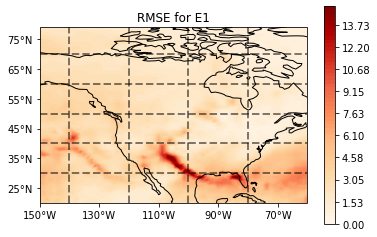

In [258]:
plot_data = E1_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E1_pvalue.where(E1_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E1")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()

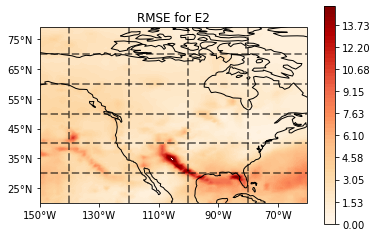

In [259]:
plot_data = E2_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E2_pvalue.where(E2_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E2")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E2_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


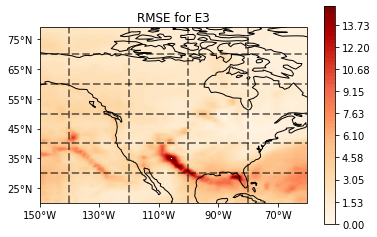

In [260]:
plot_data = E3_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E3_pvalue.where(E3_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E3")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E3_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


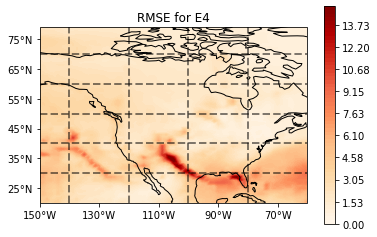

In [261]:
plot_data = E4_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E4_pvalue.where(E4_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E4")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E4_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


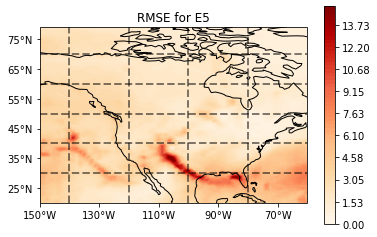

In [262]:
plot_data = E5_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E5_pvalue.where(E5_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E5")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E5_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


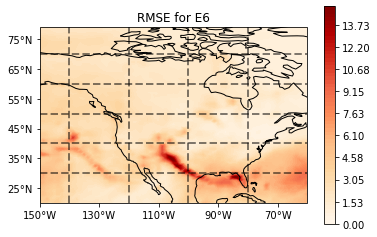

In [263]:
plot_data = E6_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E6_pvalue.where(E6_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E6")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E6_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


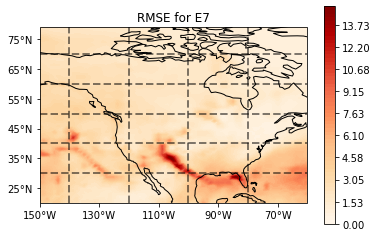

In [264]:
plot_data = E7_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E7_pvalue.where(E7_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E7")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E7_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


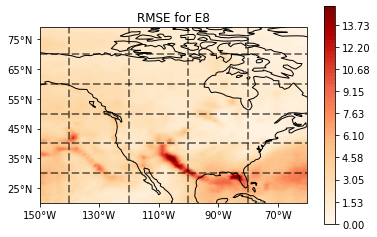

In [265]:
plot_data = E8_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E8_pvalue.where(E8_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E8")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E8_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


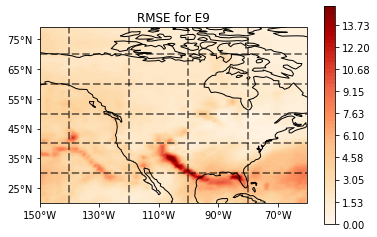

In [266]:
plot_data = E9_rmse.to_numpy().flatten()

df_del = pd.DataFrame({"lon":x_flat,"lat":y_flat,"data":plot_data})

df_filter = df_del.isin([np.nan, np.inf, -np.inf])

df_del = df_del[~df_filter]

df_del.dropna(inplace=True)

x = df_del["lon"]
y = df_del["lat"]
z = df_del["data"]

levels = np.linspace(0, 15, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.tricontourf(x, y, z,levels = levels, transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E9_pvalue.where(E9_pvalue > 0.5)
plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E9")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E9_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
plt.close()


In [165]:
E1_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1_max_rmse.csv")
E2_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E2_max_rmse.csv")
E3_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E3_max_rmse.csv")
E4_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E4_max_rmse.csv")
E5_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E5_max_rmse.csv")
E6_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E6_max_rmse.csv")
E7_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E7_max_rmse.csv")
E8_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E8_max_rmse.csv")
E9_max_rmse = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E9_max_rmse.csv")
E1_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1_max_pvalue.csv")
E2_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E2_max_pvalue.csv")
E3_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E3_max_pvalue.csv")
E4_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E4_max_pvalue.csv")
E5_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E5_max_pvalue.csv")
E6_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E6_max_pvalue.csv")
E7_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E7_max_pvalue.csv")
E8_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E8_max_pvalue.csv")
E9_max_pvalue = pd.read_csv("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E9_max_pvalue.csv")

In [201]:
E1 = xr.open_dataset("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1.nc4")

min_lon = 0
max_lon = 360

min_lat = 0
max_lat = 90

mask_lon = (E1.lon >= min_lon) & (E1.lon <= max_lon)
mask_lat = (E1.lat >= min_lat) & (E1.lat <= max_lat)

cropped_E1 = E1.where(mask_lon & mask_lat, drop=True)

In [203]:
lon = cropped_E1.lon.values -180
lat = cropped_E1.lat.values
X, Y = np.meshgrid(lon, lat)
x_flat = X.flatten()
y_flat = Y.flatten()

In [254]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E1_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E1_max_pvalue.where(E1_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E1 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E1_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.close()


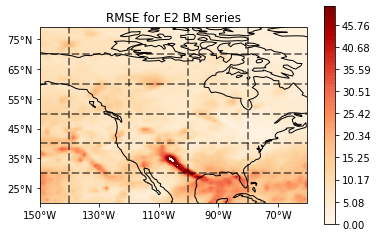

In [253]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E2_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E2_max_pvalue.where(E2_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E2 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E2_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show ()

plt.close()


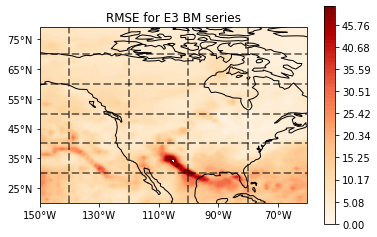

In [252]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E3_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E3_max_pvalue.where(E3_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E3 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E3_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()

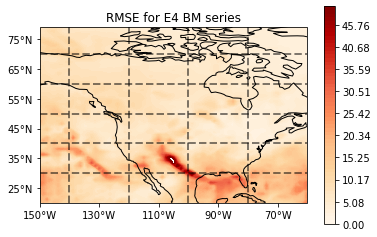

In [251]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E4_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E4_max_pvalue.where(E4_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E4 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E4_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()


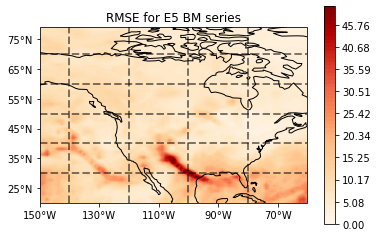

In [250]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E5_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E5_max_pvalue.where(E5_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E5 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E5_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()

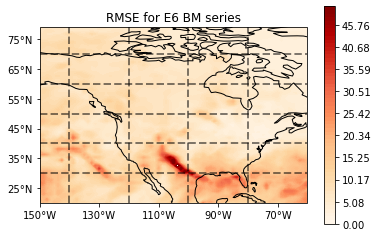

In [249]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E6_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E6_max_pvalue.where(E6_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E6 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E6_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()


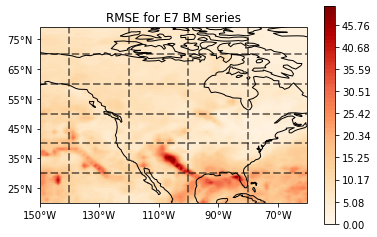

In [248]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E7_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E7_max_pvalue.where(E7_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E7 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E7_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()

In [ ]:
bins = [0,5.08,10.17,15.25,20.34,25.42,30.51,35.59,40.68,45.76]

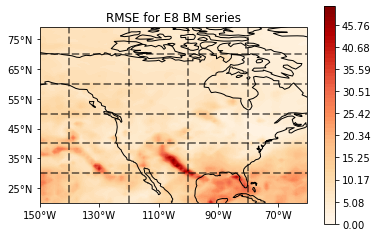

In [247]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E8_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

# mask = E8_max_pvalue.where(E8_max_pvalue > 0.5)
# plt.contourf (X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E8 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E8_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()


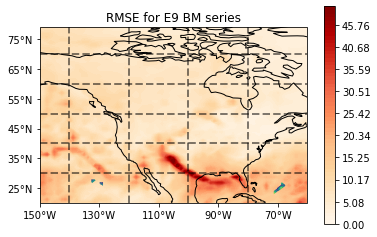

In [246]:
levels = np.linspace(0, 50, 60)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-150, -60, 20, 75])

# Make a filled contour plot
cs = ax.contourf(X, Y, E9_max_rmse, levels = levels,transform = ccrs.PlateCarree(),cmap = plt.cm.OrRd)

mask = E9_max_pvalue.where(E9_max_pvalue > 0.5)
plt.contour(X, Y, mask, hatches='.',zorder=4)

# Mask ocean data by changing adding ocean feature and changing its zorder
#ax.add_feature(cfeature.OCEAN, zorder=10, edgecolor='k')
# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,60,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent([-150, -60, 20, 75])

# Define the yticks for latitude
ax.set_yticks(np.arange(25,80,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

plt.colorbar(cs)

#cbar = plt.colorbar(cs, ax=ax,fraction = 0.04, pad=0.15,shrink=0.7)

plt.title("RMSE for E9 BM series")

plt.savefig("/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/E9_max_rmse.png",facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

plt.close()


In [305]:
np.amax(np.array(E6_max_rmse)[24:96,20:84])

59.13574534030264

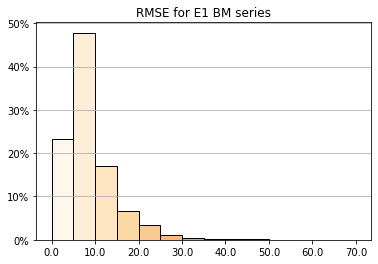

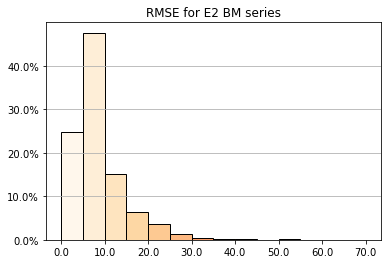

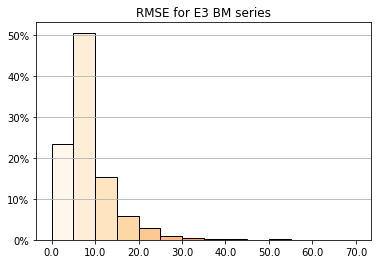

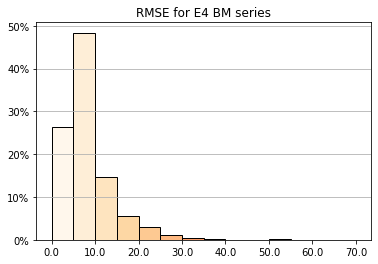

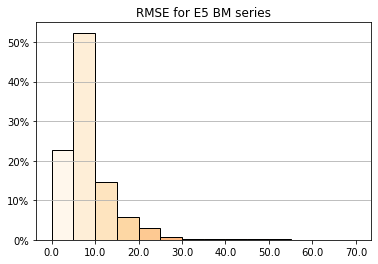

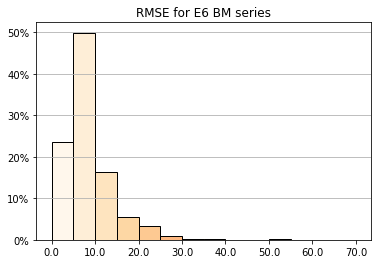

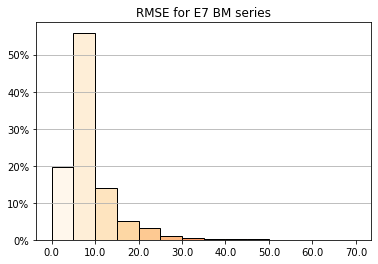

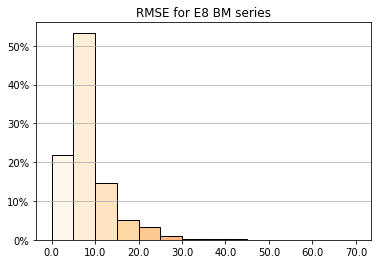

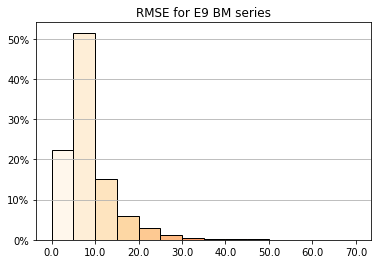

In [343]:
location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"

files = ["E1","E2","E3","E4","E5","E6","E7","E8","E9"]

for i in range(len(files)):
    
    input_data = pd.read_csv(location + files[i]+'_max_rmse.csv')

    data = (np.array(input_data)[24:96,20:84]).flatten()
    
    data = data[~np.isnan(data)]

    cm = plt.cm.get_cmap('OrRd')

    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(data,edgecolor='black',bins = np.arange(0,75,5),weights=np.ones(len(data)) / len(data))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.grid(axis = 'y')

    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # scale values to interval [0,1]
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

    plt.title("RMSE for " + files[i] +" BM series")
    
    save_name = location + files[i] + "_max_rmse_histogram.png"

    plt.savefig(save_name,facecolor=fig.get_facecolor(), edgecolor='none')

    plt.show()

    plt.close()

In [335]:
E1_rmse.max()

0      6.499548
1      6.783892
2      6.821222
3      7.274077
4      7.412561
         ...   
283    9.322603
284    7.076454
285    6.075467
286    5.638840
287    6.028649
Length: 288, dtype: float64

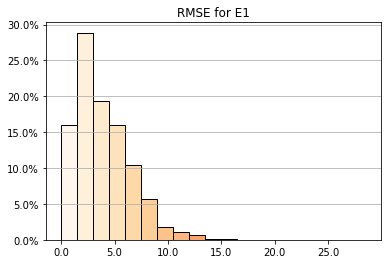

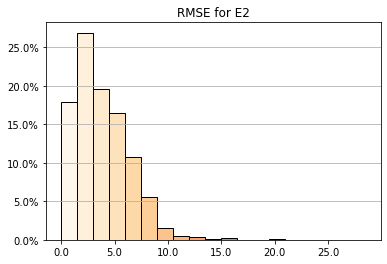

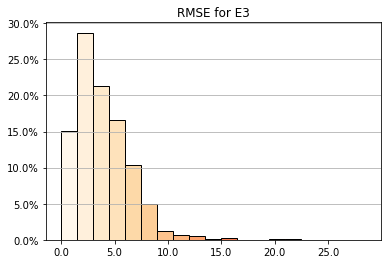

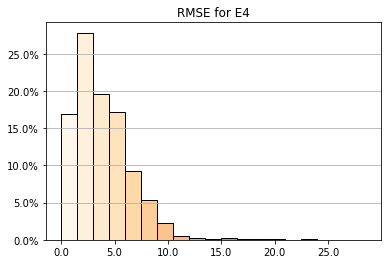

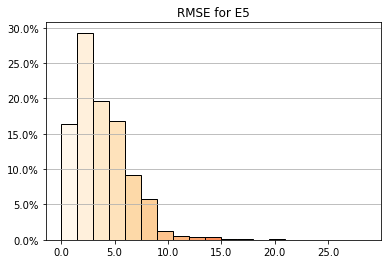

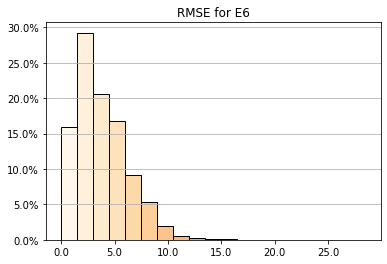

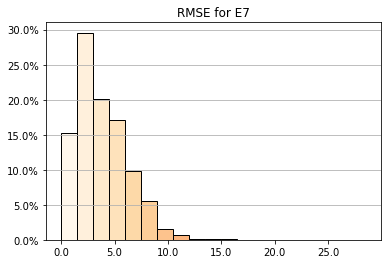

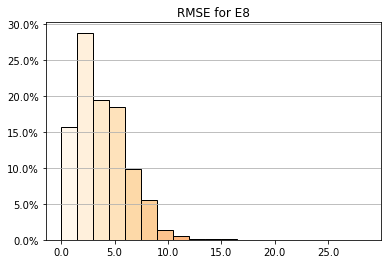

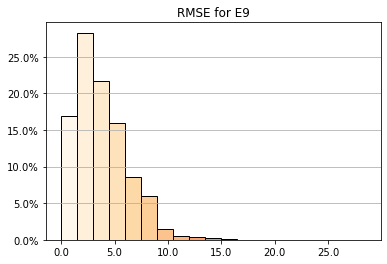

In [338]:
location = "/Users/dessyb/Library/CloudStorage/Box-Box/Patrick_MS/data/climate_model_data/"

files = ["E1","E2","E3","E4","E5","E6","E7","E8","E9"]

for i in range(len(files)):
    
    input_data = pd.read_csv(location + files[i]+'_rmse.csv')

    data = (np.array(input_data)[24:96,38:141]).flatten()
    
    data = data[~np.isnan(data)]

    cm = plt.cm.get_cmap('OrRd')

    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(data,edgecolor='black',bins = np.arange(0,30,1.5),weights=np.ones(len(data)) / len(data))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.grid(axis = 'y')

    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # scale values to interval [0,1]
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

    plt.title("RMSE for " + files[i])
    
    save_name = location + files[i] + "_rmse_histogram.png"

    plt.savefig(save_name,facecolor=fig.get_facecolor(), edgecolor='none')

    plt.show()

    plt.close()